<a href="https://colab.research.google.com/github/alicenkbaytop/DL-Tensorflow-Keras/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST FASHION RECOGNİZER**

![](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

* **Importing Modules**

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

2.3.0


* **Data Loading**

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

((train_images, train_labels), (test_images, test_labels)) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_shape = train_images.shape
test_shape = test_images.shape

print("Train shape: ", train_shape)
print("Test shape: ", test_shape)

Train shape:  (60000, 28, 28)
Test shape:  (10000, 28, 28)


In [5]:
type(train_labels)
print("Train labels unique: ", np.unique(train_labels, return_counts=True))
print("Test labels unique: ", np.unique(test_labels, return_counts=True))

Train labels unique:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
Test labels unique:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


* **Examples Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of digit classes')

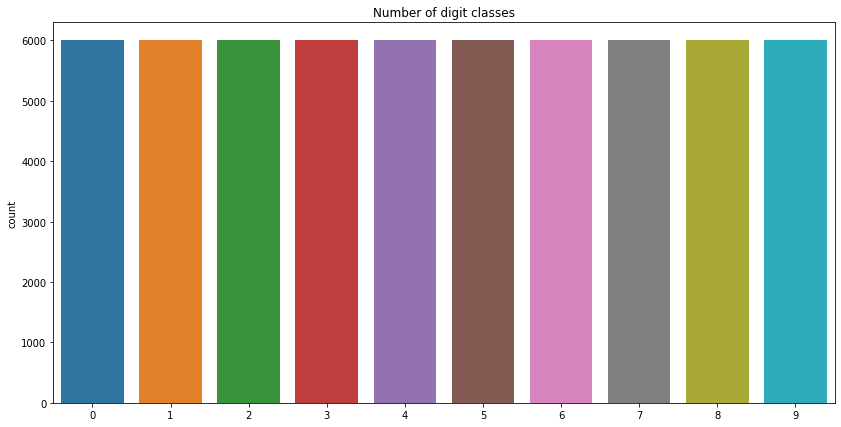

In [6]:
plt.figure(figsize=(14,7))
sns.countplot(train_labels)
sns.color_palette("viridis", as_cmap=True)
plt.title("Number of digit classes")

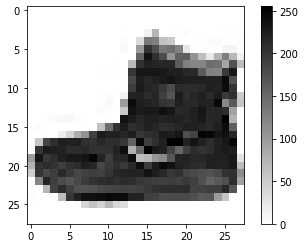

In [7]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

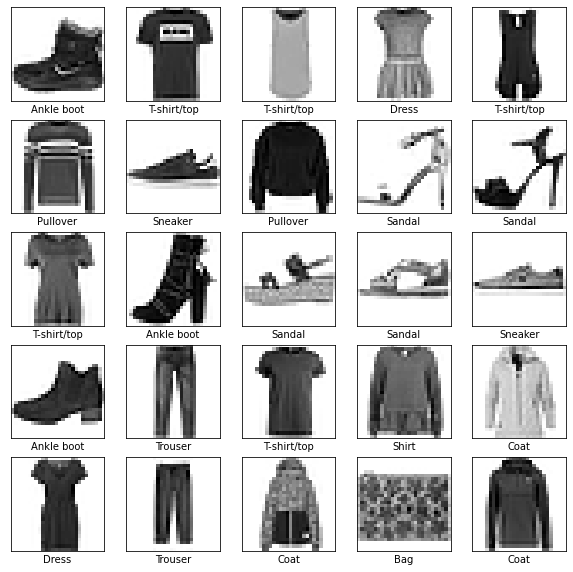

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

* **Preprocessing**

In [9]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [10]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

* **Modeling**

In [11]:
input_shape = (28,28,1)
model = tf.keras.models.Sequential([
                                 tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dropout(0.25),

                                 tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 tf.keras.layers.Dropout(0.25),

                                 tf.keras.layers.Conv2D(128, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.Conv2D(128, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dropout(0.25),

                                 tf.keras.layers.Conv2D(256, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.Conv2D(256, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.Conv2D(256, (3,3), padding='same', activation="relu", input_shape=input_shape),
                                 tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                                 tf.keras.layers.Flatten(),

                                 tf.keras.layers.Dense(units=512, activation="relu"),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dropout(0.5),

                                 tf.keras.layers.Dense(units=512, activation="relu"),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dropout(0.5),

                                 tf.keras.layers.Dense(units=10, activation="softmax")
])

* **Summary of Model** 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [14]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [15]:
history = model.fit(train_images, 
          train_labels, 
          batch_size=64, 
          epochs=15,
          validation_data=(val_images, val_labels)
          )

Epoch 1/15
844/844 [==============================] - 27s 32ms/step - loss: 0.5948 - accuracy: 0.7969 - val_loss: 0.3468 - val_accuracy: 0.8743
Epoch 2/15
844/844 [==============================] - 27s 32ms/step - loss: 0.3434 - accuracy: 0.8763 - val_loss: 0.3673 - val_accuracy: 0.8665
Epoch 3/15
844/844 [==============================] - 27s 32ms/step - loss: 0.2985 - accuracy: 0.8917 - val_loss: 0.2550 - val_accuracy: 0.9108
Epoch 4/15
844/844 [==============================] - 26s 31ms/step - loss: 0.2695 - accuracy: 0.9027 - val_loss: 0.2398 - val_accuracy: 0.9145
Epoch 5/15
844/844 [==============================] - 26s 31ms/step - loss: 0.2567 - accuracy: 0.9074 - val_loss: 0.3541 - val_accuracy: 0.8827
Epoch 6/15
844/844 [==============================] - 26s 31ms/step - loss: 0.2453 - accuracy: 0.9105 - val_loss: 0.2381 - val_accuracy: 0.9228
Epoch 7/15
844/844 [==============================] - 27s 31ms/step - loss: 0.2274 - accuracy: 0.9171 - val_loss: 0.2286 - val_accuracy:

* **Evaluating**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.2050 - accuracy: 0.9291
Test loss:  0.20498959720134735
Test accuracy:  0.929099977016449


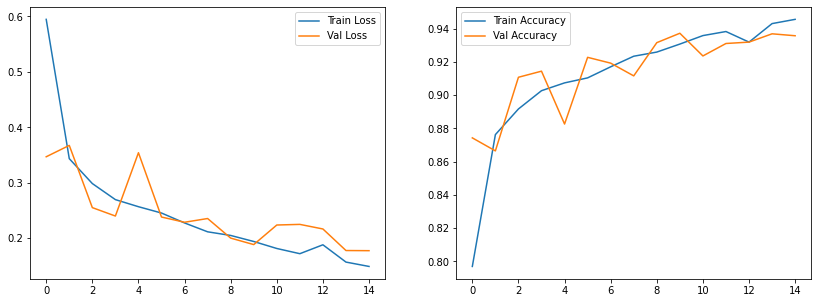

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
ax2.legend()

In [18]:
predictions = model.predict(test_images)
print(np.argmax(np.round(predictions[0])))

9


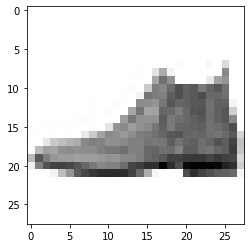

In [19]:
plt.imshow(test_images[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()